## 1) La base de données

Base de données récupérée [ici](https://www.data.gouv.fr/fr/datasets/pesticides-dans-les-eaux-souterraines/) : site du gouvernement, data.gouv, base intitulée "Pesticides dans les eaux souterraines". 

Extrait du descriptif de la base de données:
Des informations sur la contamination des eaux souterraines par les pesticides sont régulièrement diffusées.
Elles s’appuient sur l’exploitation des données provenant du réseau de surveillance des nappes souterraines
qui comprend près de 2 200 stations de mesures réparties sur le territoire français (métropole et outremer).

Les ressources suivantes sont proposées :

- Caractéristiques des stations de mesures
- Caractéristiques des différents pesticides recherchés : herbicides, insecticides, fongicides, molécules
mère, métabolites, date éventuelle d’interdiction d’usage
- Caractéristiques des différentes masses d’eau souterraines suivies
- Résultats des exploitations des mesures effectuées pour chaque station pour les millésimes 2007 à
2012 : nombre de mesures par an, pesticides recherchés, concentrations moyenne annuelle, positionnement
par rapport aux normes en vigueur, etc.
- Résultats des exploitations des mesures effectuées pour chaque station pour les millésimes 2007 à
2012 : concentrations totales en pesticides et nombre de pesticides par stations

PB de dates (seulement entre 2007-2012), 2 solutions:
- on pondère par le type de pesticides et donc le temps qu'il reste dans l'eau
- on utilise ces données pour voir si ce sont la pollution des eaux souterraines joue comme cause de la conversion de la terre au BIO.

## 2) Importation de la base de données

In [1]:
import pandas as pd
import requests

url_1 = "https://static.data.gouv.fr/resources/pesticides-dans-les-eaux-souterraines/20170622-223422/stations.csv"

# Télécharger le contenu du fichier
response = requests.get(url_1)
response.encoding = 'ISO-8859-1'  # Assurez-vous d'utiliser le bon encodage

# Lire les premières lignes
lines = response.text.splitlines()
for i, line in enumerate(lines[:10]):  # Affiche les 10 premières lignes
    print(f"Ligne {i+1}: {line}")

# les séparateurs sont des ;
# Les erreurs sont traitées, je peux avancer et associer les url à des df


Ligne 1: CD_STATION;NUM_COM;NOM_COM;NUM_DEP;codagence;ALTITUDE;PROFONDEUR_MAXI_POINT;Unité_coord_fictifs;X_FICT_L93;Y_FICT_L93;CD_ME_v2;CD_ME_niv1_surf;reseau2009;reseau2010;reseau2011;reseau2012;reseau2013;reseau2014;fi_ma_2007;fi_ma_2008;fi_ma_2009;fi_ma_2010;fi_ma_2011;fi_ma_2012;fi_ma_2013;fi_ma_2014;
Ligne 2: 06521X0019/SCE;01125;CORVEISSIAT;01;AERM&C;459;;01125_ _FRDG140;888869,8607;6577473,549;;DG140;Hors RCS et RCO;horsRCSRCODRIRE;;;;;oui;oui;oui;;;;;;
Ligne 3: 07015X0009/F;01133;CRESSIN-ROCHEFORT;01;AERM&C;229;15.2;01133_FRDG511_FRDG330;916062,9395;6525297,883;DG330;DG330;Hors RCS et RCO;;;;;;oui;;;;;;;;
Ligne 4: 07015X0010/P;01133;CRESSIN-ROCHEFORT;01;AERM&C;229,8;16;01133_FRDG511_FRDG330;915390,0333;6524380,237;DG330;DG330;Hors RCS et RCO;horsRCSRCODRIRE;;;;;;oui;;;;;;;
Ligne 5: 07011X0009/F;01138;CULOZ;01;AERM&C;236;17;01138_FRDG511_FRDG330;916376,604;6530993,354;DG330;DG330;Hors RCS et RCO;;;;;;oui;oui;oui;;;;;;
Ligne 6: 06991X0001/S;01142;DAGNEUX;01;AERM&C;196;22;01142_FR

Nous connaissons l'encodage du fichier et les séparateurs utilisés, nous pouvons donc désormais convertir les fichiers csv en dataframe.

In [2]:

df_stations = pd.read_csv(url_1, encoding='ISO-8859-1', sep=";")

url_2 = "https://static.data.gouv.fr/resources/pesticides-dans-les-eaux-souterraines/20170622-223615/pesticides.csv"
df_carac_pesticides = pd.read_csv(url_2, encoding='ISO-8859-1', sep=";")

url_3= "https://static.data.gouv.fr/resources/pesticides-dans-les-eaux-souterraines/20170622-224359/moy_tot_quantif_2007.csv"
df_concentration_totale_2007 = pd.read_csv(url_3, encoding='ISO-8859-1', sep=";")

url_4= "https://static.data.gouv.fr/resources/pesticides-dans-les-eaux-souterraines/20170622-224419/moy_tot_quantif_2008.csv"
df_concentration_totale_2008 = pd.read_csv(url_4, encoding='ISO-8859-1', sep=";")

url_5= "https://static.data.gouv.fr/resources/pesticides-dans-les-eaux-souterraines/20170622-224434/moy_tot_quantif_2009.csv"
df_concentration_totale_2009 = pd.read_csv(url_5, encoding='ISO-8859-1', sep=";")

url_6= "https://static.data.gouv.fr/resources/pesticides-dans-les-eaux-souterraines/20170622-224448/moy_tot_quantif_2010.csv"
df_concentration_totale_2010 = pd.read_csv(url_6, encoding='ISO-8859-1', sep=";")

url_7= "https://static.data.gouv.fr/resources/pesticides-dans-les-eaux-souterraines/20170622-224458/moy_tot_quantif_2011.csv"
df_concentration_totale_2011 = pd.read_csv(url_7, encoding='ISO-8859-1', sep=";")

url_8= "https://static.data.gouv.fr/resources/pesticides-dans-les-eaux-souterraines/20170622-224528/moy_tot_quantif_2012.csv"
df_concentration_totale_2012 = pd.read_csv(url_8, encoding='ISO-8859-1', sep=";")

df_concentration_totale_2007.head(2)
df_concentration_totale_2010.head(2)



,ANNEE,CD_STATION,NBPREL,MOYPTOT,MAXPTOT,MINMOLRECH,MAXMOLRECH,MINMOLQ,MAQMOLQ
0,2010.0,00057X0245/F1,1.0,0,0,63.0,63.0,0.0,0.0
1,2010.0,00057X0248/F4,1.0,0,0,63.0,63.0,0.0,0.0


Nous essayons d'effectuer la cartographie à présent.

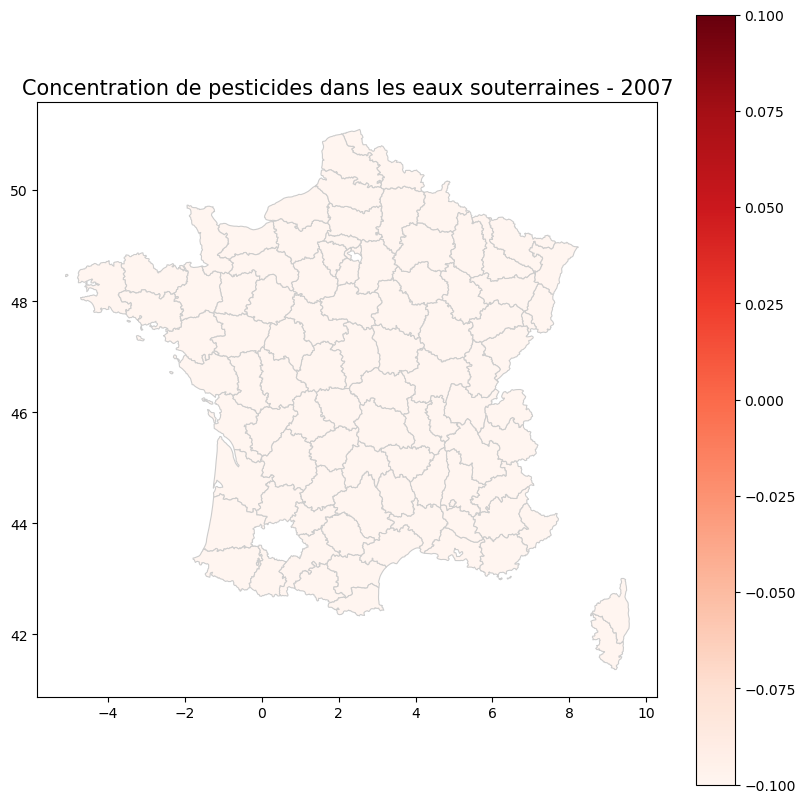

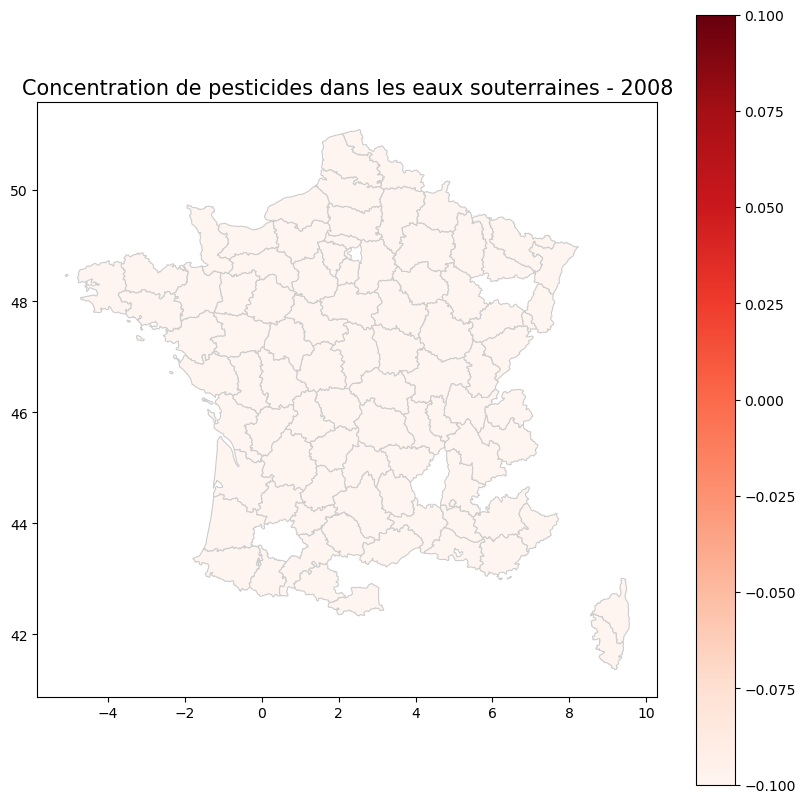

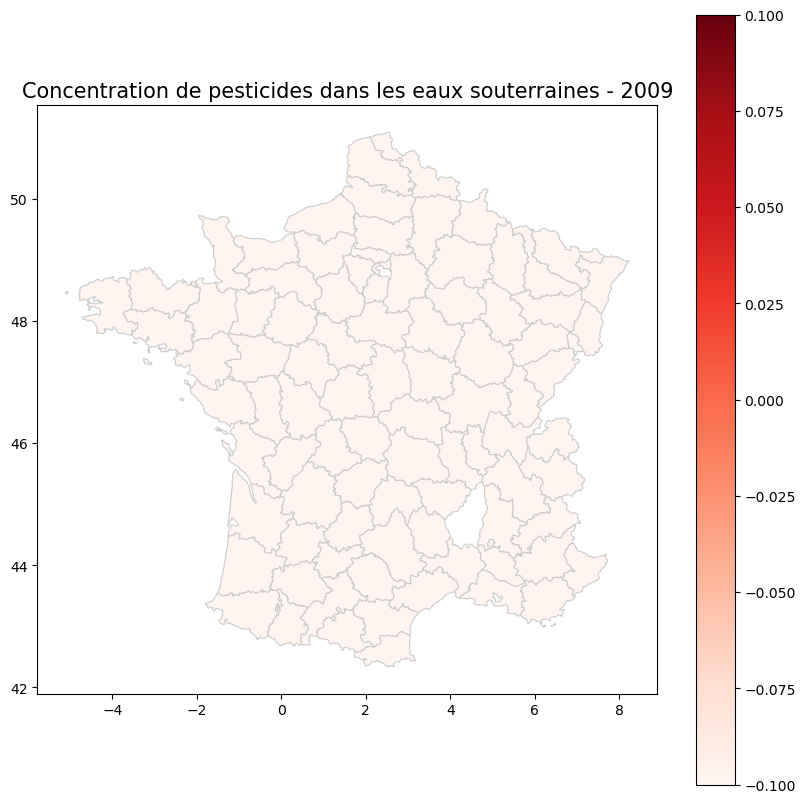

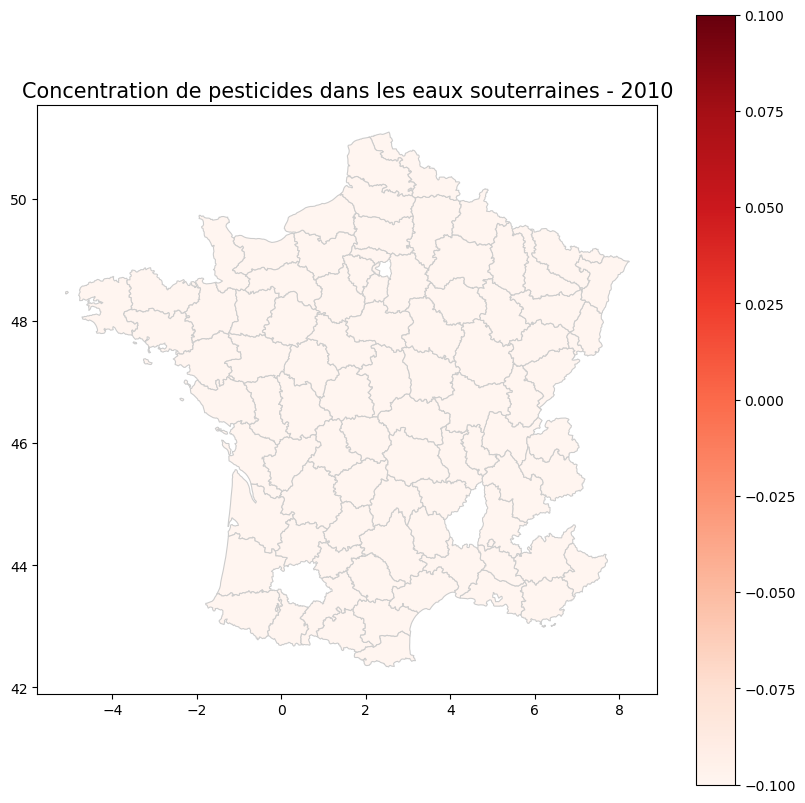

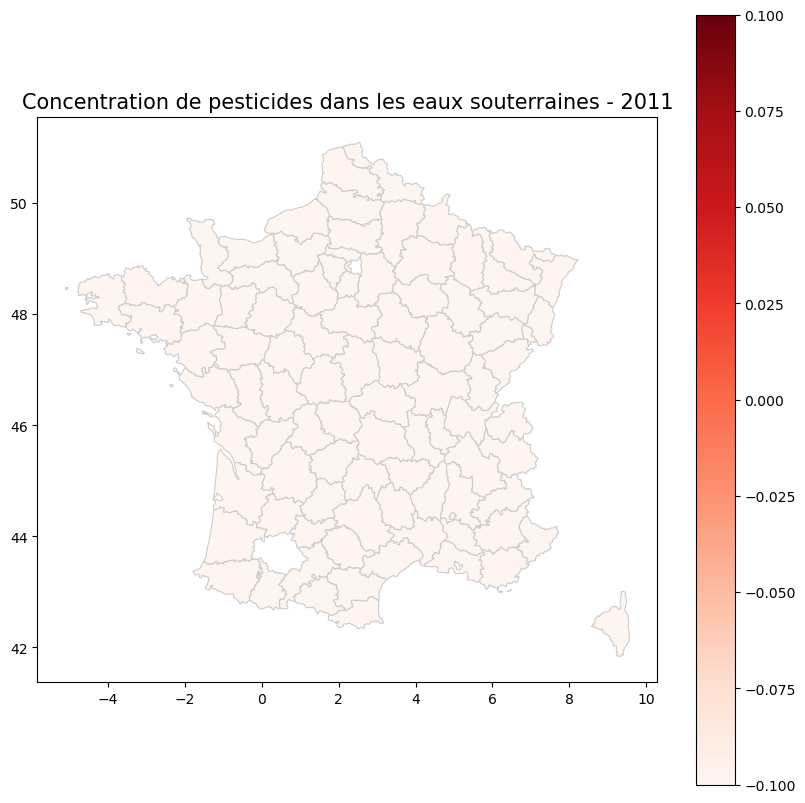

In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Charger la carte des départements
geo_url = "https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements-version-simplifiee.geojson"
gdf_france = gpd.read_file(geo_url)

# Ajouter une clé de correspondance : CD_STATION -> Département
df_stations["departement"] = df_stations["NUM_DEP"]  # Associe le département à la station

# Liste des bases de données annuelles
data_urls = [
    (2007, df_concentration_totale_2007),
    (2008, df_concentration_totale_2008),
    (2009, df_concentration_totale_2009),
    (2010, df_concentration_totale_2010),
    (2011, df_concentration_totale_2011),
]

# Préparer les données pour chaque année
concentration_per_year = {}
for year, df in data_urls:
    # Associer les stations aux départements
    df = df.merge(df_stations[["CD_STATION", "departement"]], on="CD_STATION", how="left")
    
    # Conversion en valeur numérique des éléments de la colonne MOYPTOT (ce sont des string)
    df["MOYPTOT"] = pd.to_numeric(df["MOYPTOT"], errors="coerce")

    # On supprime les lignes avec les données manquantes
    df = df.dropna(subset=["MOYPTOT"])

    # Calculer la concentration moyenne par département
    df_by_dept = df.groupby("departement").agg({"MOYPTOT": "mean"}).reset_index()
    df_by_dept.rename(columns={"MOYPTOT": "concentration"}, inplace=True)
    
    # Stocker les données pour la cartographie
    concentration_per_year[year] = df_by_dept

# Code pour tracer la carte

for year, df_by_dept in concentration_per_year.items():
    # Fusionner les données avec la carte
    gdf_year = gdf_france.merge(df_by_dept, left_on="code", right_on="departement", how="left")
    
    # Tracer la carte
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    gdf_year.plot(column="concentration", cmap="Reds", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)
    ax.set_title(f"Concentration de pesticides dans les eaux souterraines - {year}", fontsize=15)
    plt.show()

   




Nous essayons de résoudre le problème de la différence entre le nombre d'observations et le nombre de stations, en plusieurs étapes.

Commençons par regarder s'il y a des doublons dans les stations.  

In [4]:
#1) Regardons s'il y a des doublons dans les stations

departement_code = "01"
stations_dept = df_stations[df_stations["NUM_DEP"] == departement_code]
df_dept = df_concentration_totale_2007.merge(stations_dept, on="CD_STATION", how="left")

print(df_dept.groupby("CD_STATION").size())  

CD_STATION
00054X0169/F1        1
00057X0245/F1        1
00057X0248/F4        1
00061X0118/F8        1
00066X0042/SO        1
                    ..
11195X0147/FITTEL    1
11221X0134/TRAVO     1
11233X0118/PUGNAC    1
11234X0127/BARA      1
11282X0005/ARAGUI    1
Length: 1975, dtype: int64


Il n'y a pas de doublons dans les stations car chacune apparaissent une seule fois.

Regardons maintenant si la fusion des deux dataframe n'a pas engendré des doublons dans les stations.

In [5]:
#2) Regardons si la fusion des df des stations et des relevés de pollution n'a pas créé des doublons

print(df_dept.groupby("CD_STATION").size().sort_values(ascending=False).head(10))


CD_STATION
07735X0033           2
10207X0191           2
09978X0023           2
06883X0148/HY        1
06884X0009/HY        1
06898X0021/HY        1
06904X0005/HY        1
06925X0010/S         1
06931X0050/HY        1
06867X0001/SOURCE    1
dtype: int64


En effet des stations sont dédoublées. Comme plusieurs observations on été faites sur une même station, cela crée plusieurs lignes pour une même station.

Résolvons se problème en agrégeant les valeurs qui correspondent aux mêmes stations, en associant à chaque station, la moyenne des observations relevées.

Avant cela, il faut nettoyer le dataframe en s'assurant que les données sont bien de type `float`, supprimer les valeurs manquantes, convertir les référentiels géographiques ...

In [6]:
from pyproj import Transformer

# Initialiser le transformateur Lambert-93 -> WGS84
transformer = Transformer.from_crs("EPSG:2154", "EPSG:4326")

# Appliquer la transformation
df_dept["latitude"], df_dept["longitude"] = transformer.transform(
    df_dept["Y_FICT_L93"], df_dept["X_FICT_L93"]
)

#Suppression des lignes avec les valeurs manquantes
df_dept = df_dept.dropna(subset=["longitude", "latitude"])


print(df_dept[["latitude", "longitude"]].head())


ValueError: could not convert string to float: '6581106,444'

In [ ]:
# Analyse des variables du groupby pour voir où est le problème

df_dept[["CD_STATION", "MOYPTOT", "longitude", "latitude"]].tail(10)
# on remarque que le séparateur de MOYPTOT est une virgule, on peut donc se poser la question du type de cette variable

df_dept["MOYPTOT"].dtypes
# MOYPTOT est un object : 'O'. Convertissons le en valeur numérique.

df_dept["MOYPTOT"] = df_dept["MOYPTOT"].astype(str)
df_dept["MOYPTOT"] = df_dept["MOYPTOT"].str.replace(",", ".", regex=False)
df_dept["MOYPTOT"] = pd.to_numeric(df_dept["MOYPTOT"], errors="coerce")

df_dept[["CD_STATION", "MOYPTOT", "longitude", "latitude"]].tail(3)


/tmp/ipykernel_34918/2171237146.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dept["MOYPTOT"] = df_dept["MOYPTOT"].astype(str)
/tmp/ipykernel_34918/2171237146.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dept["MOYPTOT"] = df_dept["MOYPTOT"].str.replace(",", ".", regex=False)
/tmp/ipykernel_34918/2171237146.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

,CD_STATION,MOYPTOT,longitude,latitude
1340,07001X0271/403A,0.0,39.309826,-8.762083
1341,07002X0020/SCE,0.0,39.359855,-8.740909
1342,07011X0108/PZ,0.0,39.375339,-8.638230


In [ ]:
# Agréger les données par station
df_dept = df_dept.groupby("CD_STATION").agg({
    "MOYPTOT": "mean",  # Prendre la moyenne des concentrations si plusieurs valeurs
    "longitude": "first",  # Garder la première coordonnée (identique pour toutes les doublons)
    "latitude": "first"    # Garder la première coordonnée
}).reset_index()

print(df_dept.groupby("CD_STATION").size().sort_values(ascending=False).head(10))


CD_STATION
06257X0002/320A    1
06268X0017/SCE     1
06276X1002/P2      1
06277X0084/SO      1
06288X0072/O71A    1
06295X0006/F2      1
06512X0023/289A    1
06516X0024/211A    1
06518X0028/F       1
06526X0067/P       1
dtype: int64


Le problème est réglé ! Il n'y a plus de doublons: chaque station est associée à une seule valeur d'observation (son observation ou la moyenne de ses observations s'il y en avait plusieurs).

Réessayons alors de faire la cartographie à l'échelle d'un département.

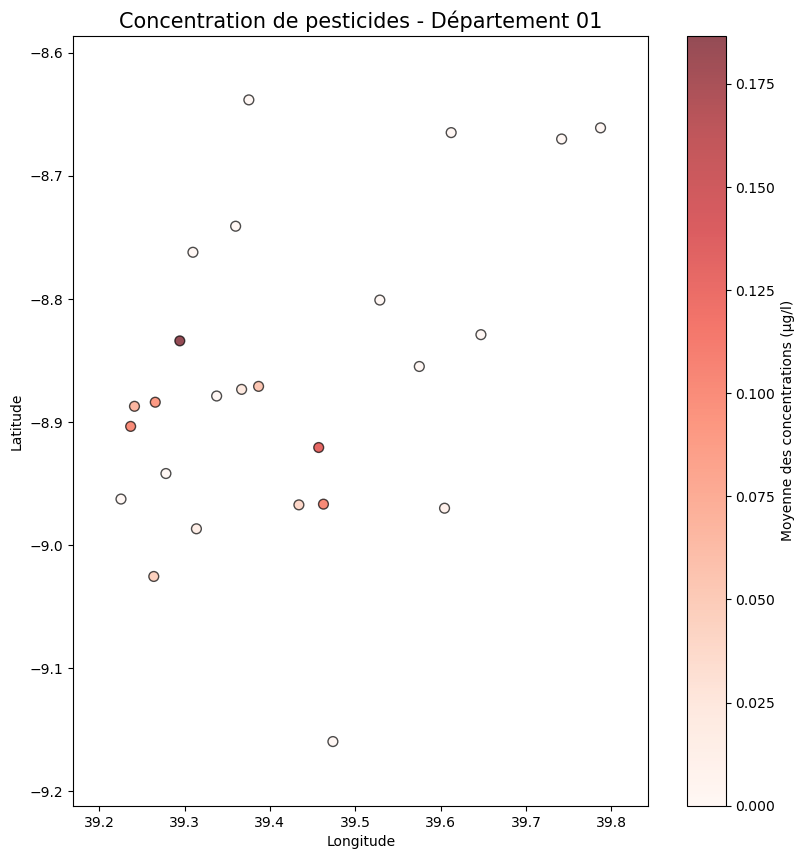

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Charger la carte des départements de France
geo_url = "https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements-version-simplifiee.geojson"
gdf_france = gpd.read_file(geo_url)

# Filtrer uniquement le département 01
departement_code = "01"
gdf_dept = gdf_france[gdf_france["code"] == departement_code]

# Calculer les limites de la zone pour zoomer automatiquement
min_lon, max_lon = df_dept_aggregated["longitude"].min(), df_dept_aggregated["longitude"].max()
min_lat, max_lat = df_dept_aggregated["latitude"].min(), df_dept_aggregated["latitude"].max()

# Ajuster les marges autour des points
lon_margin = (max_lon - min_lon) * 0.1
lat_margin = (max_lat - min_lat) * 0.1

# Tracer la carte avec superposition des stations
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf_dept.plot(ax=ax, color="lightgrey", edgecolor="black", alpha=0.5)  # Carte du département

# Ajouter les stations
scatter = ax.scatter(
    df_dept_aggregated["longitude"],
    df_dept_aggregated["latitude"],
    c=df_dept_aggregated["MOYPTOT"],  # Les concentrations des pesticides
    cmap="Reds",  # Colormap pour indiquer l'intensité
    s=50,  # Taille des points
    edgecolor="k",
    alpha=0.7
)

# Ajuster les limites de l'axe pour zoomer
ax.set_xlim(min_lon - lon_margin, max_lon + lon_margin)
ax.set_ylim(min_lat - lat_margin, max_lat + lat_margin)

# Ajouter une barre de couleur
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label("Moyenne des concentrations (µg/l)")

# Ajouter le titre et les axes
ax.set_title(f"Concentration de pesticides - Département {departement_code}", fontsize=15)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()





On essaie d'obtenir un graphe qui met plus en perspective nos résultats en le superposant au fond de carte du département 01.

Problème: je ne peux pas le faire car les coordonnées géographiques des stations ont été attribuées aléatoirement.

Toutefois je possède d'autres informations: le numéro du département des stations, le nom de leur commune, ... Nous allons essayer de se baser sur ces informations.

In [ ]:
df_dept_aggregated.head(2)

,CD_STATION,MOYPTOT,longitude,latitude
0,06257X0002/320A,0.00,-1.363152,-5.983614
1,06268X0017/SCE,0.01,-1.363151,-5.983613


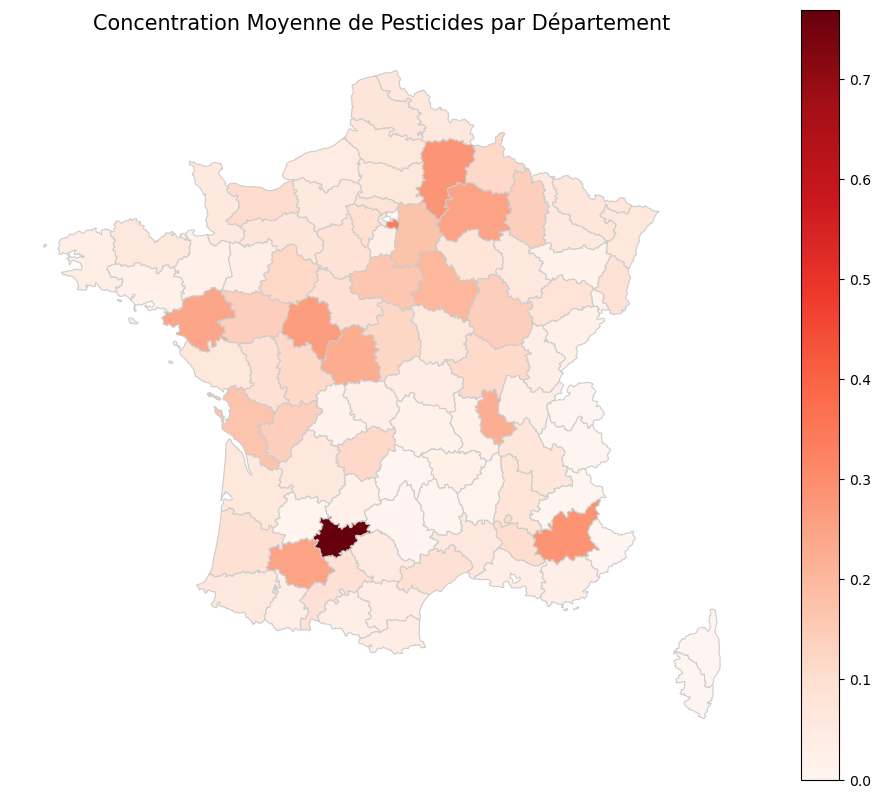

In [7]:
## Étape 1 : Fusionner les données avec les départements
df_fusion = df_concentration_totale_2007.merge(
    df_stations[["CD_STATION", "departement"]],  # Garder seulement les colonnes nécessaires
    on="CD_STATION",  # Clé pour fusionner
    how="left"  # Fusion pour garder toutes les lignes de df_concentration_totale_2007
)

# Étape 2 : Supprimer les lignes avec des départements manquants
df_fusion = df_fusion.dropna(subset=["MOYPTOT", "departement"])  # Supprimer les valeurs NaN dans MOYPTOT ou departement

# Étape 3 : Remplacer les virgules par des points dans MOYPTOT et convertir en float
df_fusion["MOYPTOT"] = df_fusion["MOYPTOT"].str.replace(",", ".", regex=False)  # Remplacer les virgules par des points
df_fusion["MOYPTOT"] = pd.to_numeric(df_fusion["MOYPTOT"], errors="coerce")  # Convertir en float

# Étape 4 : Calculer la moyenne des concentrations par département
moyenne_par_departement = df_fusion.groupby("departement")["MOYPTOT"].mean().reset_index()

# Renommer les colonnes pour plus de clarté
moyenne_par_departement.columns = ["Département", "Concentration Moyenne (µg/l)"]

# Étape 5 : Afficher les résultats
moyenne_par_departement

import geopandas as gpd
import matplotlib.pyplot as plt

# Charger la carte des départements de France
geo_url = "https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements-version-simplifiee.geojson"
gdf_france = gpd.read_file(geo_url)

# Fusionner les résultats avec la carte des départements
# Assurez-vous que les colonnes des départements dans les deux DataFrames sont bien alignées (par exemple, des codes comme "01", "02", etc.)
gdf_france = gdf_france.merge(
    moyenne_par_departement,
    left_on="code",  # Correspond au code du département dans le GeoJSON
    right_on="Département",  # Correspond au code du département dans les résultats
    how="left"  # Garder tous les départements, même ceux sans données
)

# Tracer la carte avec la colorimétrie
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
gdf_france.plot(
    column="Concentration Moyenne (µg/l)",  # Colonne utilisée pour la colorimétrie
    cmap="Reds",  # Palette de couleurs
    linewidth=0.8,
    ax=ax,
    edgecolor="0.8",
    legend=True
)

# Ajouter un titre et retirer les axes pour une meilleure lisibilité
ax.set_title("Concentration Moyenne de Pesticides par Département", fontsize=15)
ax.axis("off")  # Supprimer les axes

plt.show()




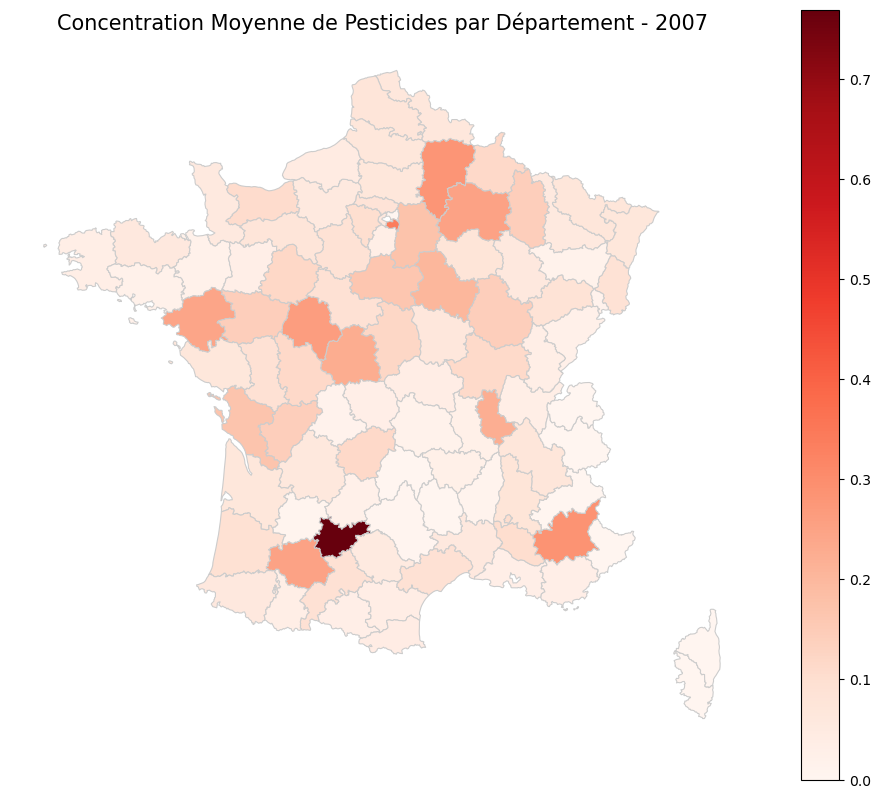

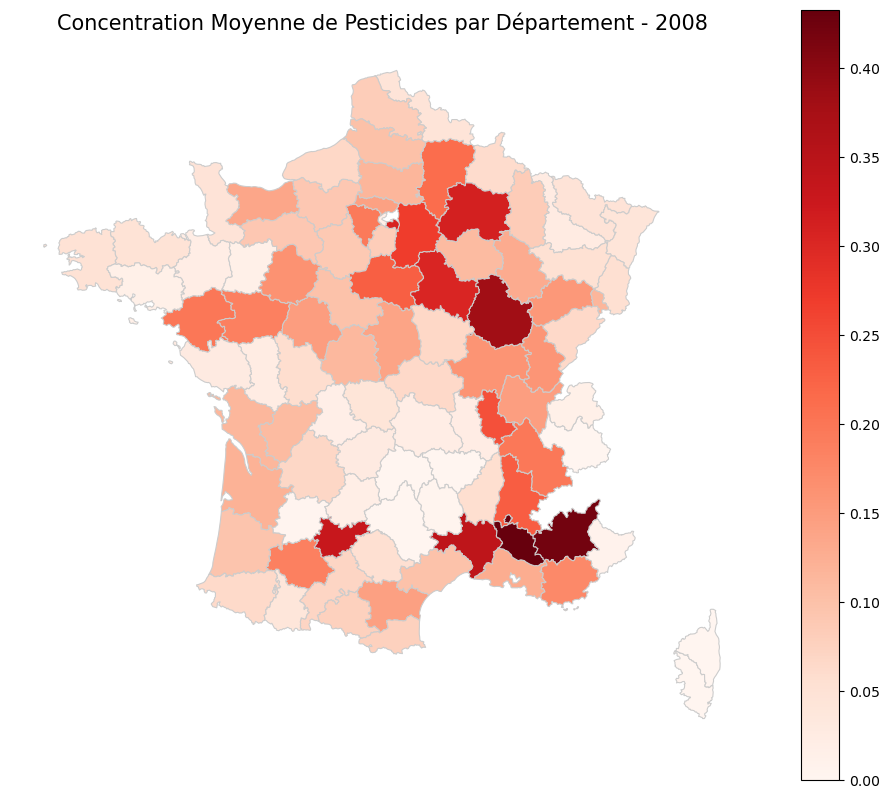

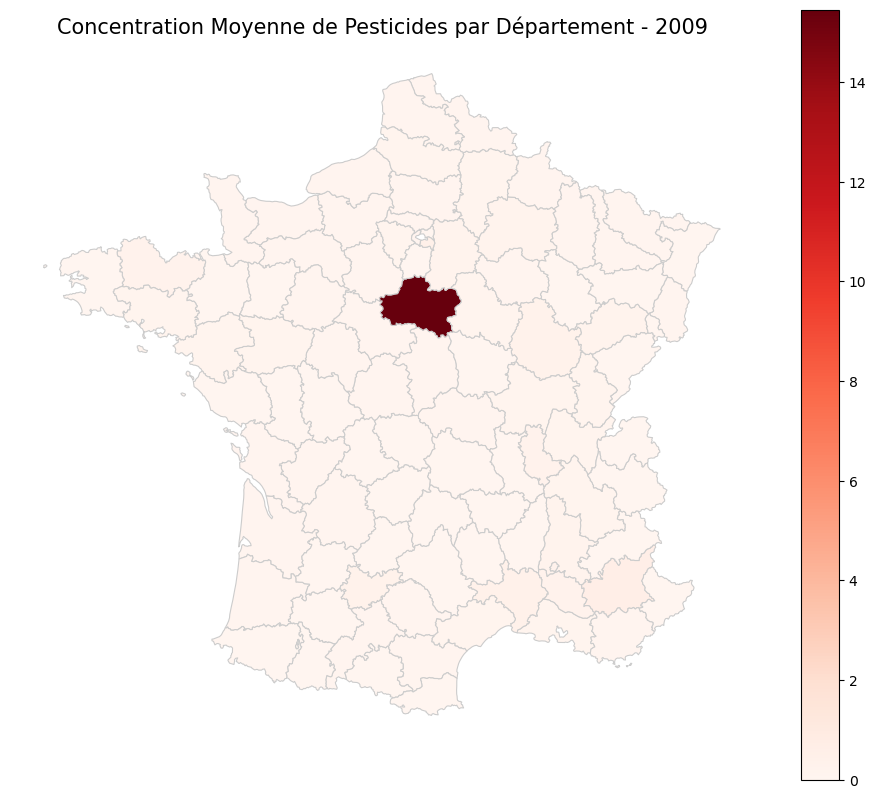

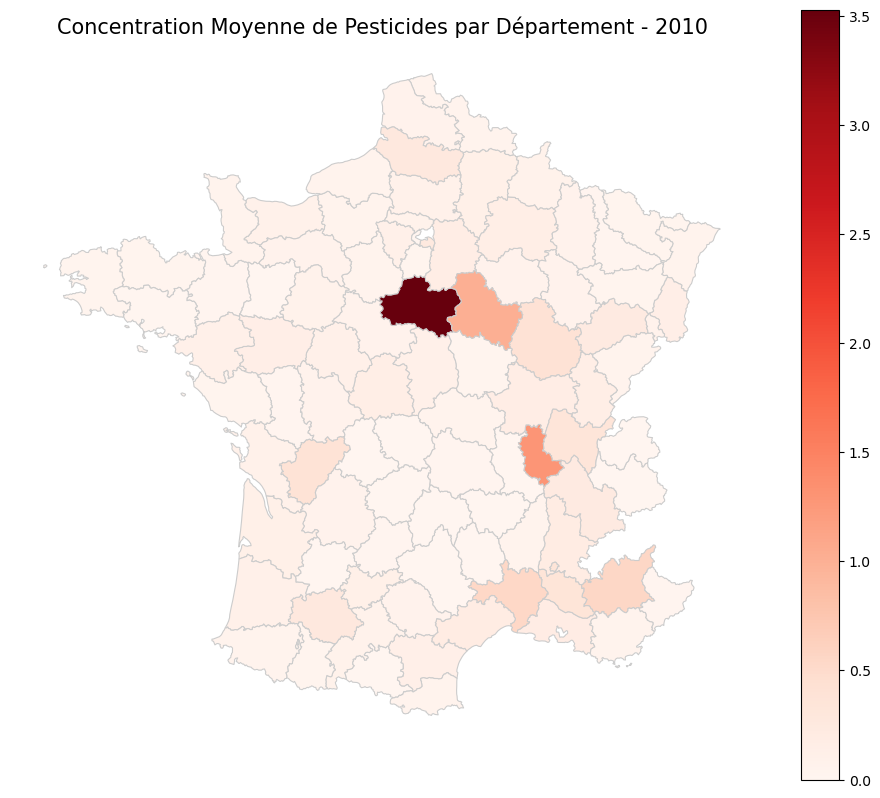

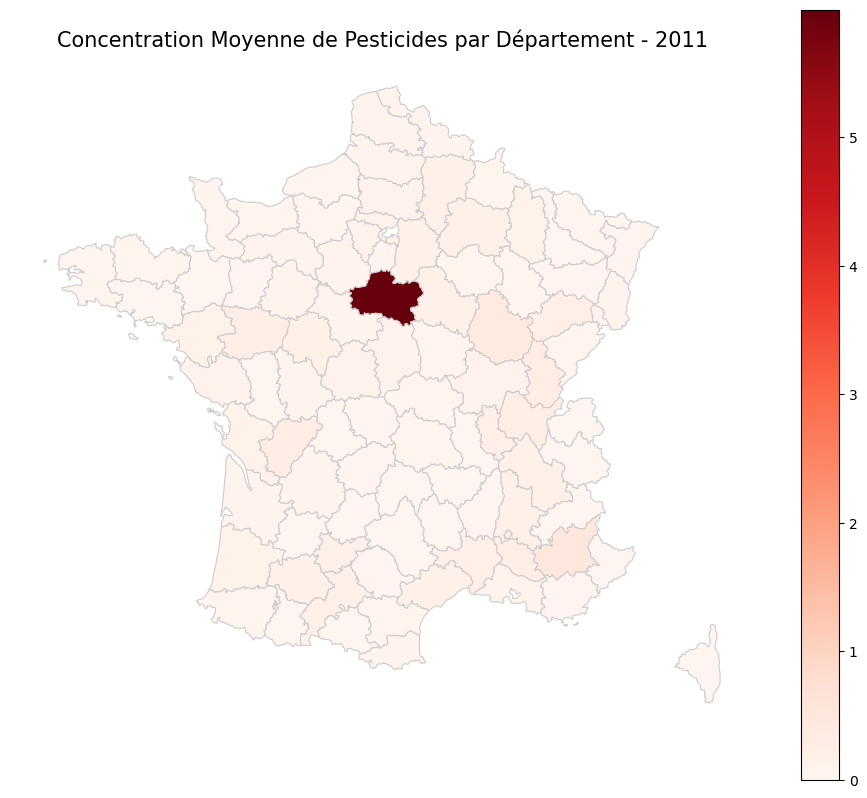

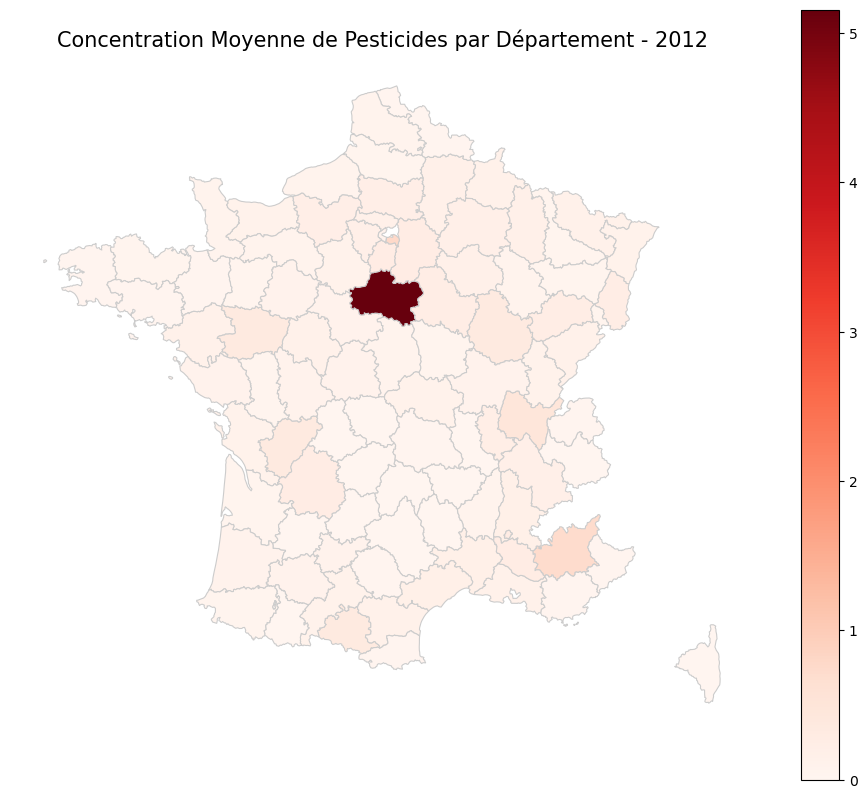

In [8]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Fonction pour traiter les données pour une année donnée
def traiter_donnees_pour_annee(df_concentration, df_stations, gdf_france):
    # Étape 1 : Fusionner les données avec les départements
    df_fusion = df_concentration.merge(
        df_stations[["CD_STATION", "departement"]],
        on="CD_STATION",
        how="left"
    )

    # Étape 2 : Supprimer les lignes avec des départements manquants
    df_fusion = df_fusion.dropna(subset=["MOYPTOT", "departement"])

    # Étape 3 : Remplacer les virgules par des points dans MOYPTOT et convertir en float
    df_fusion["MOYPTOT"] = df_fusion["MOYPTOT"].str.replace(",", ".", regex=False)
    df_fusion["MOYPTOT"] = pd.to_numeric(df_fusion["MOYPTOT"], errors="coerce")

    # Étape 4 : Calculer la moyenne des concentrations par département
    moyenne_par_departement = df_fusion.groupby("departement")["MOYPTOT"].mean().reset_index()
    moyenne_par_departement.columns = ["Departement", "Concentration Moyenne (\u00b5g/l)"]

    # Étape 5 : Fusionner les résultats avec la carte des départements
    gdf_france_annee = gdf_france.merge(
        moyenne_par_departement,
        left_on="code",
        right_on="Departement",
        how="left"
    )

    return gdf_france_annee

# Charger la carte des départements de France
geo_url = "https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements-version-simplifiee.geojson"
gdf_france = gpd.read_file(geo_url)

# Liste des années
df_concentration_annees = {
    2007: df_concentration_totale_2007,
    2008: df_concentration_totale_2008,
    2009: df_concentration_totale_2009,
    2010: df_concentration_totale_2010,
    2011: df_concentration_totale_2011,
    2012: df_concentration_totale_2012
}

# Tracer les cartes pour chaque année
for annee, df_concentration in df_concentration_annees.items():
    gdf_france_annee = traiter_donnees_pour_annee(df_concentration, df_stations, gdf_france)

    # Tracer la carte
    fig, ax = plt.subplots(1, 1, figsize=(12, 10))
    gdf_france_annee.plot(
        column="Concentration Moyenne (\u00b5g/l)",
        cmap="Reds",
        linewidth=0.8,
        ax=ax,
        edgecolor="0.8",
        legend=True
    )

    # Ajouter un titre et retirer les axes
    ax.set_title(f"Concentration Moyenne de Pesticides par Département - {annee}", fontsize=15)
    ax.axis("off")

    # Afficher la carte
    plt.show()
